In [1]:
%cd '/home/oscarp/cursos/CursoFundamentosPracticosML/code/datasets/'
!ls

/home/oscarp/cursos/CursoFundamentosPracticosML/code/datasets
canciones-2018.csv  salarios.csv  titanic-test.csv
diabetes.csv	    titanic.png   titanic-train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [3]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


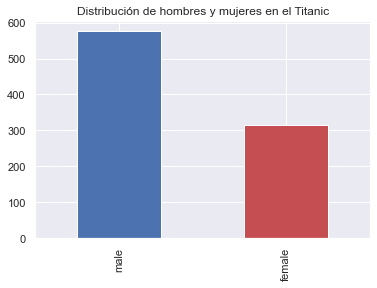

In [5]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b','r'])
plt.title('Distribución de hombres y mujeres en el Titanic')
plt.show()

In [6]:
men = train_df.loc[train_df['Sex'] == 'male']
women = train_df.loc[train_df['Sex'] == 'female']
men.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


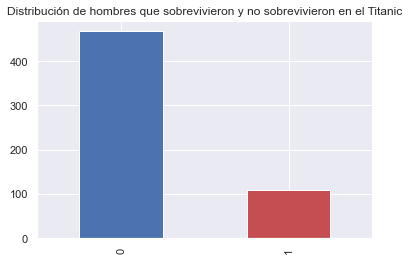

In [7]:
men.Survived.value_counts().plot(kind = 'bar', color = ['b','r'])
plt.title('Distribución de hombres que sobrevivieron y no sobrevivieron en el Titanic')
plt.show()

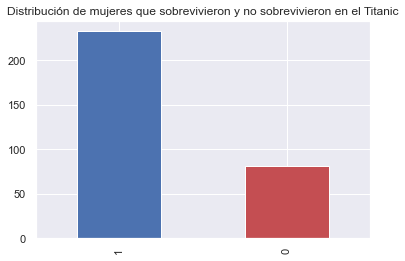

In [8]:
women.Survived.value_counts().plot(kind = 'bar', color = ['b','r'])
plt.title('Distribución de mujeres que sobrevivieron y no sobrevivieron en el Titanic')
plt.show()

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [11]:
train_predictors = train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
train_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
categorical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].nunique() < 10 and
                    train_predictors[cname].dtype == 'object']

In [13]:
categorical_cols

['Sex', 'Embarked']

In [14]:
numerical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].dtype in ['int64', 'float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
my_cols = categorical_cols + numerical_cols
my_cols

['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
train_predictors = train_predictors[my_cols]
train_predictors.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500


In [17]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [20]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = .2, random_state = 1)

In [21]:
tree_one = tree.DecisionTreeClassifier()
tree_one =tree_one.fit(x_train, y_train)

In [22]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print(f'tree_one_accuracy: {tree_one_accuracy * 100}%')

tree_one_accuracy: 78.21000000000001%


In [23]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file= out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True